# 신경망 모델 훈련 시 과적합(Overfitting) 방지

* MLP를 활용한 의류 이미지 분류

과적합(Overfitting)

딥러닝 학습에 너무 복잡한 모델을 쓰면 Training 데이터에 대해서는 정확하게 설명할 수 있으나 Test 데이터에 대한 예측력이 매우 떨어지는 현상

즉, 학습데이터만 과하게 학습하여 일반화 성능이 떨어지는 것을 의미


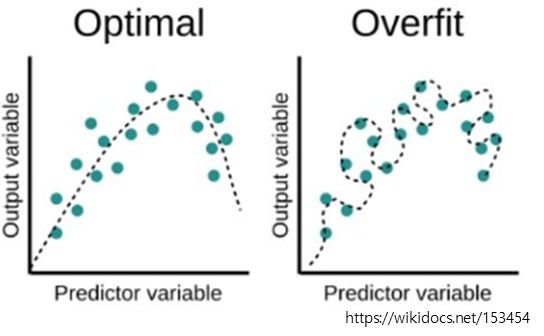

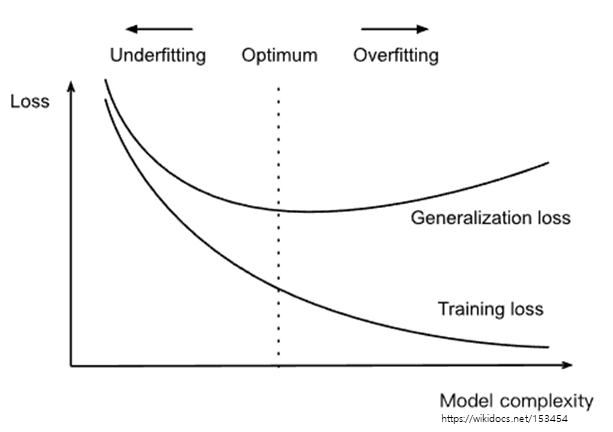

* 드롭아웃(Dropout)

딥러닝은 파라미터가 매우 많은 모델이고, 파라미터가 많다는 것은 모델의 복잡도가 높다는 것을 의미함 


앞서 모델의 복잡도가 너무 높으면 overfitting이 발생할 수 있다하였으므로 딥러닝 모델의 많은 노드 중 일부를 무작위로 삭제 시키는 방법

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 고정
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

#1. 데이터 로드
* Fashion MNIST data set
  * 딥러닝을 처음 배울 때 많이 사용하는 데이터셋으로, 28*28 사이즈의 패션 아이템 이미지로 구성된 데이터 

  
  | 레이블      | 0      | 1    | 2      | 3      | 4    | 5    | 6    | 7        | 8    | 9         |
| ----------- | ------ | ---- | ------ | ------ | ---- | ---- | ---- | -------- | ---- | --------- |
| 패션 아이템 | 티셔츠 | 바지 | 스웨터 | 드레스 | 코트 | 샌달 | 셔츠 | 스니커즈 | 가방 | 앵클 부츠 |
  



  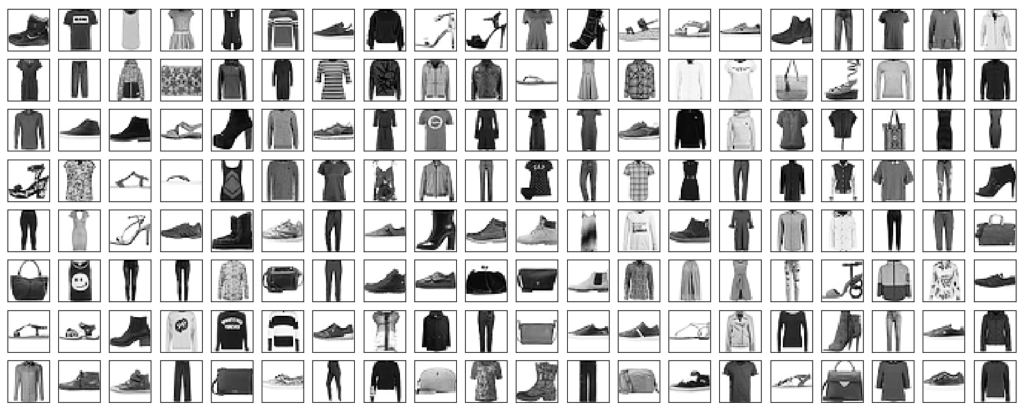

In [2]:
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


##2. 데이터 전처리
###2-1. 데이터 스케일

In [3]:
X_train_scaled = X_train / 255.0
X_train_scaled.shape

(60000, 28, 28)

###2-2. 데이터 셋 나누기(Train / Test)

In [4]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_train_scaled, y_train, test_size = 0.2, random_state = 2022)

In [5]:
X_train_scaled.shape

(48000, 28, 28)

In [ ]:
X_test_scaled.shape

(12000, 28, 28)

#3. 모델링(MLP)

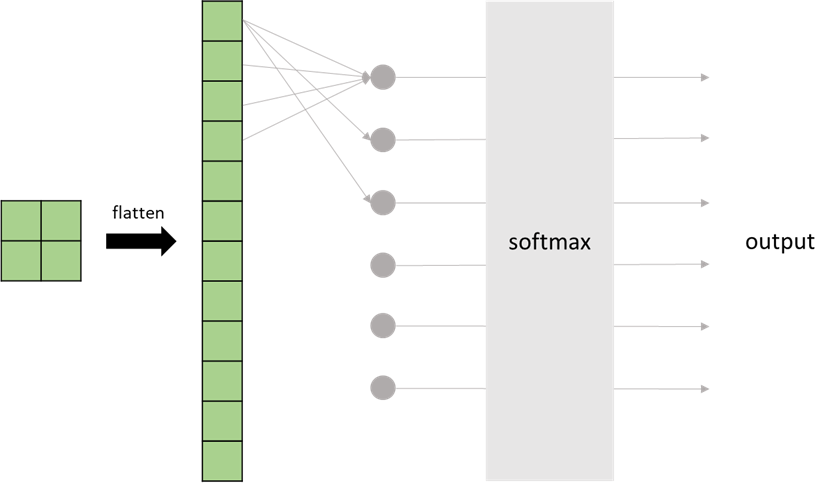

In [6]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape= (28,28)))
model.add(keras.layers.Dense(10, activation = 'softmax'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


#4. 모델 학습 및 평가

* verbose: 훈련 과정 출력을 조절하는 파라미터
  * 1: 에포크마다 진행 막대와 함께 손실 등의 지표 표현
  * 2: 진행 막대 빼고 출력
  * 0: 훈련 과정을 별도로 표시하지 않음 

In [8]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(X_train_scaled, y_train, epochs=10, verbose=1) #훈련 측정 값이 담겨있는 딕셔너리 

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6106 - accuracy: 0.7960
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4797 - accuracy: 0.8393
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4566 - accuracy: 0.8481
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4451 - accuracy: 0.8516
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4370 - accuracy: 0.8542
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4325 - accuracy: 0.8569
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4280 - accuracy: 0.8577
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4253 - accuracy: 0.8599
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4219 - accuracy: 0.8607
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.422

In [9]:
model.evaluate(X_test_scaled, y_test)

375/375 [==============================] - 1s 2ms/step - loss: 0.4413 - accuracy: 0.8568


[0.44125646352767944, 0.8568333387374878]

* 학습 결과 시각화

In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

  * 학습 에러 시각화

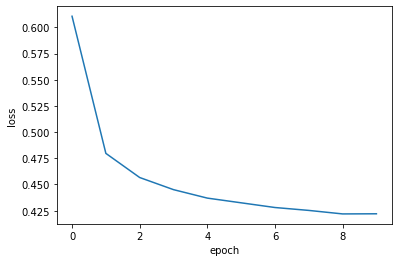

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

##5. 모델 재구성 및 재학습(MLP)

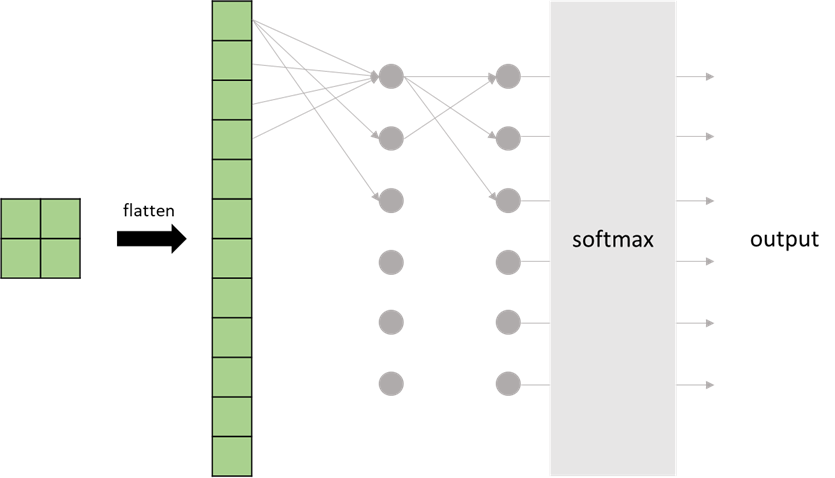

In [12]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape= (28,28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(X_train_scaled, y_train, epochs=15, verbose=1) #훈련 측정 값이 담겨있는 딕셔너리 

Epoch 1/15
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5290 - accuracy: 0.8153
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3930 - accuracy: 0.8594
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3566 - accuracy: 0.8723
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3363 - accuracy: 0.8794
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3205 - accuracy: 0.8856
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3109 - accuracy: 0.8889
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3022 - accuracy: 0.8933
Epoch 8/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2965 - accuracy: 0.8947
Epoch 9/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2885 - accuracy: 0.9002
Epoch 10/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.282

* 학습 결과 시각화

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

  * 학습 에러 시각화

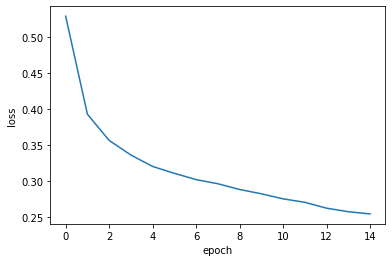

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

* 학습 정확도 시각

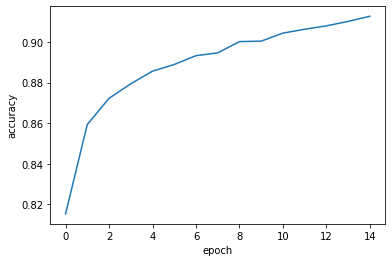

In [17]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

##6. 모델 평가

In [20]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape= (28,28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [21]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(X_train_scaled, y_train, epochs=15, verbose=1, 
                    validation_data=(X_test_scaled, y_test))

Epoch 1/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5297 - accuracy: 0.8139 - val_loss: 0.4469 - val_accuracy: 0.8341
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3916 - accuracy: 0.8590 - val_loss: 0.3677 - val_accuracy: 0.8642
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3559 - accuracy: 0.8729 - val_loss: 0.3612 - val_accuracy: 0.8705
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3334 - accuracy: 0.8822 - val_loss: 0.3812 - val_accuracy: 0.8654
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3177 - accuracy: 0.8864 - val_loss: 0.3535 - val_accuracy: 0.8770
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3094 - accuracy: 0.8906 - val_loss: 0.3512 - val_accuracy: 0.8741
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3004 - accuracy: 0.8949 - val_loss: 0.3512 - val_accuracy:

In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


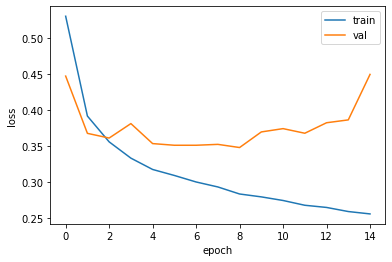

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

트레인 에러는 줄어들지만, 테스트 에러가 증가하는 현상 발생
=> overfitting

##6. 오버피팅 완화
* 드롭아웃(drop out)

In [24]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape= (28,28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(X_train_scaled, y_train, epochs=15, verbose=1, 
                    validation_data=(X_test_scaled, y_test))

Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5896 - accuracy: 0.7936 - val_loss: 0.4423 - val_accuracy: 0.8339
Epoch 2/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4488 - accuracy: 0.8427 - val_loss: 0.3921 - val_accuracy: 0.8581
Epoch 3/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4236 - accuracy: 0.8516 - val_loss: 0.3915 - val_accuracy: 0.8609
Epoch 4/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4138 - accuracy: 0.8596 - val_loss: 0.3866 - val_accuracy: 0.8640
Epoch 5/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4013 - accuracy: 0.8631 - val_loss: 0.3869 - val_accuracy: 0.8684
Epoch 6/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3981 - accuracy: 0.8645 - val_loss: 0.3791 - val_accuracy: 0.8658
Epoch 7/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3914 - accuracy: 0.8679 - val_loss: 0.3914 - val_accuracy:

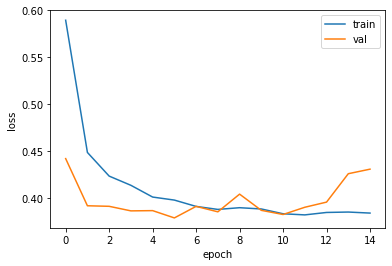

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()